<a href="https://colab.research.google.com/github/josephtrill/CSST102_TRILLANA_BSCS-3A/blob/main/3A_TRILLANA_EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory Exercise 1: Linear Regression Implementation**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


**Data Preprocessing**

In [6]:
df = pd.read_csv('datasets_house_prices.csv')
df.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


In [7]:
missing_values = df.isnull().sum()
print("Missing values in columns")
print(missing_values)

Missing values in columns
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [8]:
features = df[['Size (sqft)', 'Bedrooms', 'Age']]
scaler = StandardScaler()
df[['Size (sqft)', 'Bedrooms', 'Age']] = scaler.fit_transform(features)

In [9]:
df.head()
df.isnull().sum()

,0
Size (sqft),0
Bedrooms,0
Age,0
Proximity to Downtown (miles),0
Price,0


**2. Model Implementation**

In [10]:
class LinearRegression:
  def __init__(self):
    self.coefficient = None

  def fit(self, x, y):
    x_b = np.c_[np.ones((x.shape[0], 1)), x]
    self.coefficient = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

  def predict(self, x):
    x_b = np.c_[np.ones((x.shape[0], 1)), x]
    return x_b.dot(self.coefficient)

In [11]:
x = df[['Size (sqft)', 'Bedrooms', 'Age']].values
y = df['Price'].values

model = LinearRegression()
model.fit(x, y)

print("Coefficient:", model.coefficient)

Coefficient: [719053.2124581  279093.63216406   6820.87007249  -6018.12737433]


In [12]:
house = np.array([[200, 3, 20]])
predict_price = model.predict(house)
print("predicted price:P",predict_price[0])

predicted price:P 56437879.70800157


**3. Model Training**

In [13]:
x = df[['Size (sqft)', 'Bedrooms', 'Age']].values
y = df['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

In [15]:
y_train_predict = model.predict(x_train)
mse_train = np.mean((y_train - y_train_predict) ** 2)
print("MSE on training data: ", mse_train)

MSE on training data:  170277648.51955354


In [16]:
y_test_predict = model.predict(x_test)
mse_test = np.mean((y_test - y_test_predict) ** 2)
print("MSE on testing data: ", mse_test)

MSE on testing data:  167882080.37329385


**4. Model Evaluation**

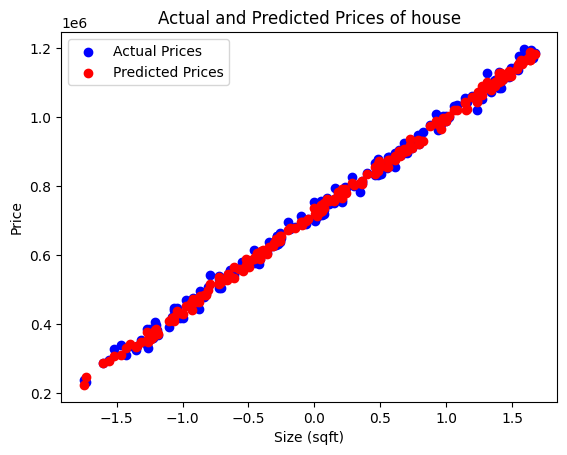

In [17]:
plt.scatter(x_test[:, 0], y_test, color = 'blue', label = 'Actual Prices')
plt.scatter(x_test[:, 0], y_test_predict, color = 'red', label = 'Predicted Prices')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('Actual and Predicted Prices of house')
plt.legend()
plt.show()

## **Report Summary**
In this project, we created a simple linear regression model from scratch in Python to predict house prices based on factors like house size, number of bedrooms, and age. We started by loading the dataset into a Pandas DataFrame and addressed any missing values. To ensure feature consistency, we normalized the data using scikit-learn’s StandardScaler.

Rather than relying on pre-built libraries like scikit-learn for the regression model, we manually implemented the linear regression algorithm. This involved calculating key parameters, such as the slope and intercept, using the least squares method. We also wrote a custom function to predict house prices based on the given features.

After splitting the dataset into training and testing sets, we trained the model on the training data. We evaluated the model by calculating the Mean Squared Error (MSE) for both the training and test sets. To visually assess its performance, we plotted the regression line along with the test data points, providing a clear view of the model’s accuracy.